# Número óptimo de clusters

Utilizando el método del codo con la *distorsión* y la *inercia*.

## Datasets

In [1]:
import numpy as np

from sklearn.datasets import make_blobs

# --- datasets ---
# parameters 
n_samples = 900
random_state = 42
# for rotated blobs
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

# blobs
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

#X = np.dot(X, transformation)  # Anisotropic blobs

#X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)  # Unequal variance

#X = np.vstack((X[y == 0][:300], X[y == 1][:100], X[y == 2][:10]))  # Unevenly sized blobs
#y = [0] * 300 + [1] * 100 + [2] * 10


## Visualización de los datos

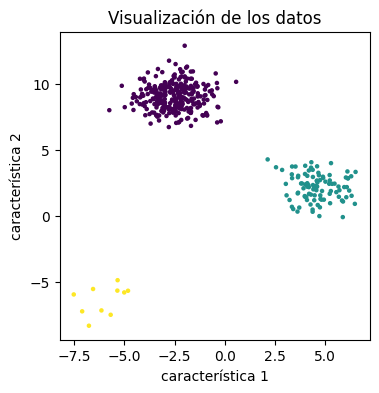

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.title('Visualización de los datos')
plt.xlabel('característica 1')
plt.ylabel('característica 2')

plt.show()

## *Distorción* e *inercia*

In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# cdist = distancia entre dos puntos

distortions = []
inertias = []
# for printing
mapping1 = {}
mapping2 = {}
K = range(1, 10) # número de clusters

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=1, random_state=random_state).fit(X)
    
    # distorsión - definición
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    # inercia - incluida en el método
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Método del hombro para la *distorción*

Distortion values:
1 : 24.784040193603932
2 : 6.002220222215742
3 : 5.545274051835889
4 : 1.4238409491512765
5 : 1.2626769827964588
6 : 0.9311744794583907
7 : 0.8047048745635539
8 : 0.7481449417386955
9 : 0.6435643769064713


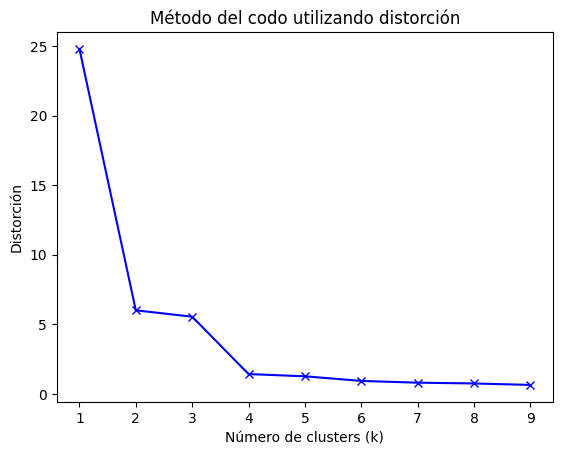

In [6]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorción')
plt.title('Método del codo utilizando distorción')
plt.show()

Método del hombro para la *inercia*.

Inertia values:
1 : 10161.456479377608
2 : 2460.910291108454
3 : 2273.5623612527156
4 : 583.7747891520236
5 : 517.697562946548
6 : 381.7815365779401
7 : 329.92899857105715
8 : 306.7394261128652
9 : 263.86139453165333


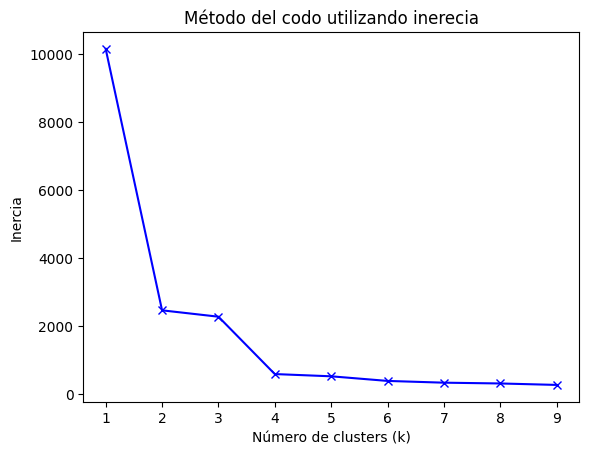

In [7]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo utilizando inerecia')
plt.show()

## Visualización de los clusters para diferentes valores de K

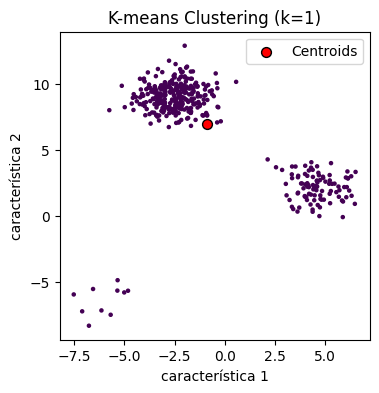

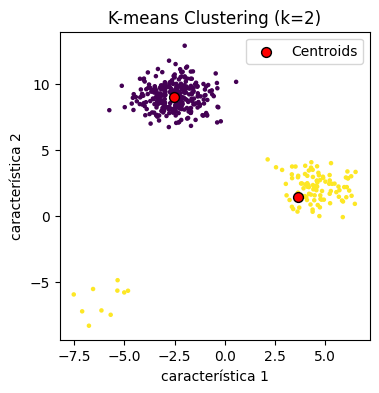

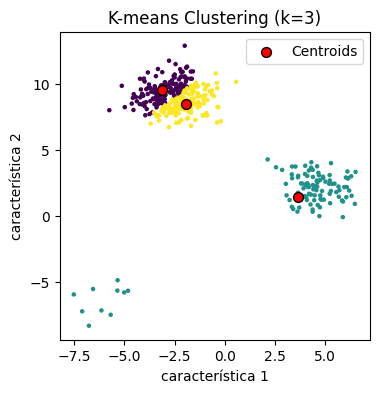

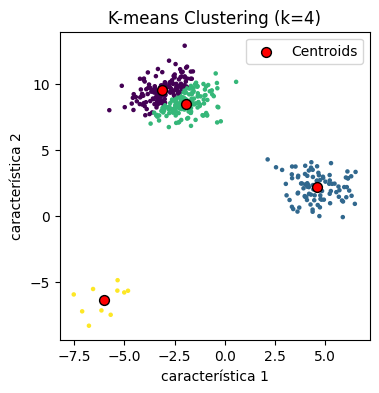

In [8]:
k_range = range(1, 5)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=1, random_state=random_state)
    y_kmeans = kmeans.fit_predict(X)
    
    plt.figure(figsize=(4,4))
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=50, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('característica 1')
    plt.ylabel('característica 2')
    plt.legend(loc='best')
    plt.show()